In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import glob
import cmocean as cmo
import seawater as sw
import sys

sys.path.append('../')
import src.data.export_log_data as efuncs
import src.data.read_functions as rfuncs

drive='e:'
campaign='SDA-trials-2023'
folder = 'files'
subfolder='log'
savefolder='processed-log-data'


# root dir
rootpath = os.path.dirname(os.getcwd())
# log files directory
logdir=os.path.join(drive,campaign,folder,subfolder)
# save directory
savedir=os.path.join(drive,campaign,folder,savefolder)
os.makedirs(savedir, exist_ok=True)  

## Umzip all the files (if not unzipped already)
## CTD data
files=glob.glob(logdir+'\*ctd*')# list files
if files:
# determine if files are zipped. If yes, unzip, if no, continue
    ctdfiles=os.path.join(logdir,'*ctd-slocum*.xml.gz')    
    import gzip, shutil
    flelist=glob.glob(ctdfiles)
    for i in flelist:
        xfle=os.path.splitext(i)[0]
        if not os.path.isfile(xfle):
            with gzip.open(i, 'r') as f_in, open( i[:-3], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

files=glob.glob(logdir+'\*sbp*')
if files:
    # determine if files are zipped. If yes, unzip, if no, continue
    files=os.path.join(logdir,'*sbp*.xml.gz')    
    import gzip, shutil
    flelist=glob.glob(files)
    for i in flelist:
        xfle=os.path.splitext(i)[0]
        if not os.path.isfile(xfle):
            with gzip.open(i, 'r') as f_in, open( i[:-3], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
                
files=glob.glob(logdir+'\*gps*')
if files:    
    # determine if files are zipped. If yes, unzip, if no, continue
    files=os.path.join(logdir,'*gps-*.xml.gz')    
    import gzip, shutil
    flelist=glob.glob(files)
    for i in flelist:
        xfle=os.path.splitext(i)[0]
        if not os.path.isfile(xfle):
            with gzip.open(i, 'r') as f_in, open( i[:-3], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

files=glob.glob(logdir+'\*nav*')
if files: 
# determine if files are zipped. If yes, unzip, if no, continue
    navfiles=os.path.join(logdir,'*navigator*.xml.gz')    
    import gzip, shutil
    flelist=glob.glob(navfiles)
    for i in flelist:
        xfle=os.path.splitext(i)[0]
        if not os.path.isfile(xfle):
            with gzip.open(i, 'r') as f_in, open( i[:-3], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

files=glob.glob(logdir+'\*aanderaa*')
# determine if files are zipped. If yes, unzip, if no, continue
if files: 
    files=os.path.join(logdir,'*aanderaa*.xml.gz')    
    import gzip, shutil
    flelist=glob.glob(files)
    for i in flelist:
        xfle=os.path.splitext(i)[0]
        if not os.path.isfile(xfle):
            with gzip.open(i, 'r') as f_in, open( i[:-3], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

# export all the data to csv format
nvdf, ctdf, aandf, sbpdf, gpdf = efuncs.export_log_data(logdir,savedir)

In [4]:
# create merged file
## always gps and nav log to mege first to new df

# round timestamp to o decimal places ready for merging
nvdf=nvdf.round({'timestamp': 0})
gpdf=gpdf.round({'timestamp': 0})

# drop unwanted variables form nav data
gpdf=gpdf.drop(columns=[
     'build-number',
     'build-tag',
     'log-level',
     'rate',
     'sbf-remote-com-port',
     'sbf-local-com-port',
     'vsp-local-com-port',
     'corrections-local-com-port',
     'vsp-local-tcp-port',
     'corrections-local-udp-port',
     'vsp-enabled',
     'corrections-enabled',
     'sbf-enabled',
     'sbf-unicast-enabled',
     'sbf-unicast-port',
     'sbf-unicast-interface',
     'log-nmea',
     'log-messages',
     'multicast-receive-enabled',
     'multicast-receive-port',
     'multicast-receive-addr',
     'multicast-receive-interface',
     'messages-received',
     'raw-logged-bytes',
     'received-telnet-bytes',
     'sent-corr-bytes',
     'sent-corr-packets',
     'sent-telnet-bytes',
     'time-since-gga',
     'time-since-sent',
     'diff-age',
     'sats',
     'stnRef',
     'cogt',
     'lat-dev',
     'lon-dev',
     'sogk',
     'sogm'])

# drop unwanted variables form nav data
nvdf=nvdf.drop(columns=[
     'magnetic-deviation',
     'pressure-warnings',
     'lat-lon-precision',
     'average-water-density',
     'sound-velocity',
     'center-actuators-on-idle',
     'dead-reckoning-orientation',
     'dead-reckoning-velocity',
     'orientation',
     'position',
     'variance',
     'velocity'])

# rename duplicat variables (t,s, sv, from control module?
nvdf=nvdf.rename(columns={"time": "time-nav",
                          "salinity": "salinity-nav",
                          "temperature": "temperature-nav",
                          "sound-velocity": "sound-velocity-nav"})

auvmerge=pd.merge(nvdf, gpdf,how='outer',on='timestamp')

# ctd
if not ctdf.empty:
    ctdf=ctdf.round({'timestamp': 0})
    auvmerge=pd.merge(auvmerge, ctdf,how='outer',on='timestamp')

# aandera 
if not aandf.empty:
    print('to be done later, when we have some data')
    
# sbp 
if not sbpdf.empty:
    print('to be done later, when we have some data')          

In [19]:
auvmerge.to_csv(os.path.join(savedir,'auvdata.csv')) 

In [18]:
savedir

'e:SDA-trials-2023\\files\\processed-log-data'

In [11]:
list(auvmerge)

['timestamp',
 'time-nav',
 'temperature-nav',
 'dead-reckoning-position',
 'dead-reckoning-variance',
 'altitude',
 'dead-reckoning-distance',
 'DRHeading',
 'DRVelocity',
 'DRPitch',
 'DRRoll',
 'DRLat',
 'DRLon',
 'speed',
 'Heading',
 'Pitch',
 'Roll',
 'Depth',
 'Lat',
 'Lon',
 'salinity-nav',
 'water-density',
 'time_x',
 'UTC',
 'lat',
 'lon',
 'quality',
 'hdop',
 'time_y',
 'conductivity',
 'pressure',
 'salinity',
 'sound-velocity',
 'temperature']

<Axes: xlabel='DRLon', ylabel='DRLat'>

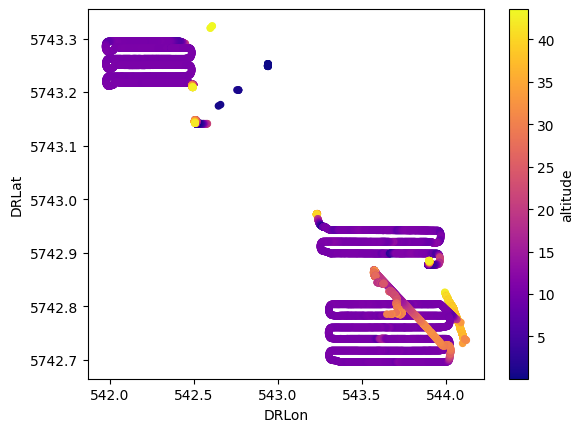

In [30]:
## plot 
auvmerge.plot(kind='scatter',
        x='DRLon',
        y='DRLat',
        c='altitude',
        colormap='plasma')

<Axes: xlabel='DRLon', ylabel='DRLat'>

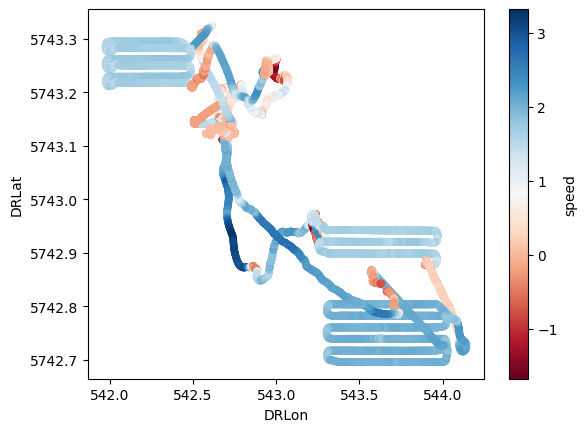

In [27]:
auvmerge.plot(kind='scatter',
        x='DRLon',
        y='DRLat',
        c='speed',
        colormap='RdBu')

In [ ]:
# round timestamp to o decimal places ready for merging
nvdf=nvdf.round({'timestamp': 0})
ctdf=ctdf.round({'timestamp': 0})

# drop unwanted variables form nav data
nvdf=nvdf.drop(columns=['pressure-warnings', 
                        'magnetic-deviation',
                        'center-actuators-on-idle',
                        'average-water-density'])
# rename duplicat variables (t,s, sv, from control module?
nvdf=nvdf.rename(columns={"time": "time-nav",
                          "salinity": "salinity-nav",
                          "temperature": "temperature-nav",
                          "sound-velocity": "sound-velocity-nav"})


In [ ]:
auvmerge=pd.merge(nvdf, ctdf,how='outer',on='timestamp')
test

In [ ]:
test

In [ ]:

# scatter plot
test.plot(kind='scatter',
        x='DRLon',
        y='DRLat',
        c='salinity',
        colormap='viridis')